In [1]:
%matplotlib inline
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd


### 装载数据库
装载数据库文件，并打开cursor
列出出数据库中的所有表方便了解数据库结构

In [2]:
db_filename='dinofunworld-1.db'
conn = sqlite3.connect(db_filename)
cursor = conn.cursor()
sql = ("SELECT name "
      "FROM sqlite_master "
      "WHERE type='table' "
      " order by name")
data = cursor.execute(sql).fetchall()
pd.DataFrame(data,columns=["tables"])


,tables
0,attraction
1,checkin
2,sequences


# 图表 1：描绘惊险飞车（thrill ride）景点的访问人次的饼图。

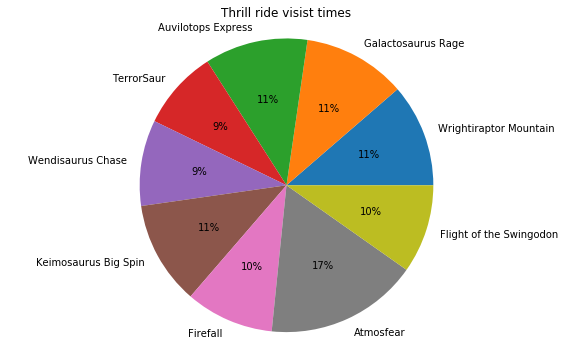

In [3]:
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

sql = ("SELECT t2.name, "
       "COUNT(t1.visitorID) as num "
      "FROM checkin t1 inner join attraction t2 "
      "ON t1.attraction = t2.AttractionID "
      "WHERE t2.category='Thrill Rides\r' "
      "GROUP BY t2.AttractionID ")
data = cursor.execute(sql).fetchall()

labels = []
visistTimes = []

for record in data:
    labels.append(record[0])
    visistTimes.append(record[1])

plt.pie(visistTimes,labels=labels,autopct='%.0f%%')

plt.axis('equal')
plt.title('Thrill ride visist times')
plt.show()


# 图表 2：描绘美食摊位（food stall）总访问量的柱状图。

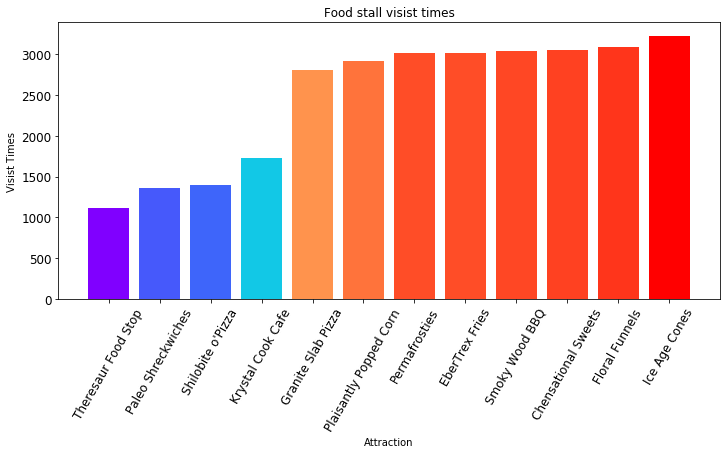

In [10]:
import numpy as np

pylab.rcParams['figure.figsize'] = (10.0, 6.0)

sql = ("SELECT t2.name, "
       "COUNT(t1.visitorID) as num "
      "FROM checkin t1 inner join attraction t2 "
      "ON t1.attraction = t2.AttractionID "
      "WHERE t2.category='Food\r' "
      "GROUP BY t2.AttractionID "
      "ORDER BY num")
data = cursor.execute(sql).fetchall()

labels = []
visistTimes = []

for record in data:
    labels.append(record[0])
    visistTimes.append(record[1])
    
cmap = plt.get_cmap("rainbow")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))



plt.bar(range(len(visistTimes)), visistTimes, tick_label=labels, color=cmap(rescale(visistTimes)))
plt.xticks(rotation=60)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.title('Food stall visist times')
plt.xlabel("Attraction")
plt.ylabel("Visist Times")
plt.show()

# 图表 3：描绘一天之中参加最新游乐项目 Atmosfear 的折线图。

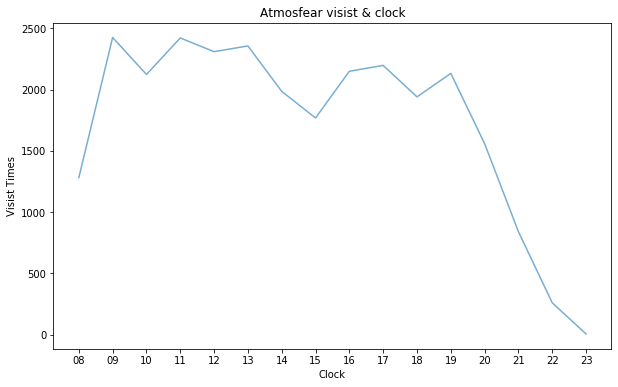

In [27]:
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

sql = ("SELECT COUNT(t1.visitorID) as num, "
       "SUBSTR(t1.timestamp,12,2) as peroid "
      "FROM checkin t1 inner join attraction t2 "
      "ON t1.attraction = t2.AttractionID "
      "WHERE t2.name='Atmosfear'"
      "GROUP BY t2.AttractionID,peroid "
      "ORDER BY peroid")

data = cursor.execute(sql).fetchall()

clock = []
visistTimes = []

for record in data:
    clock.append(record[1])
    visistTimes.append(record[0])
plt.xlabel("Clock")
plt.ylabel("Visist Times")
plt.plot(clock,visistTimes,alpha=0.6)
plt.title('Atmosfear visist & clock')
plt.show()

# 图表 4：描绘游乐场的儿童碰碰车（Kiddie Rides）总游览量的箱线图。

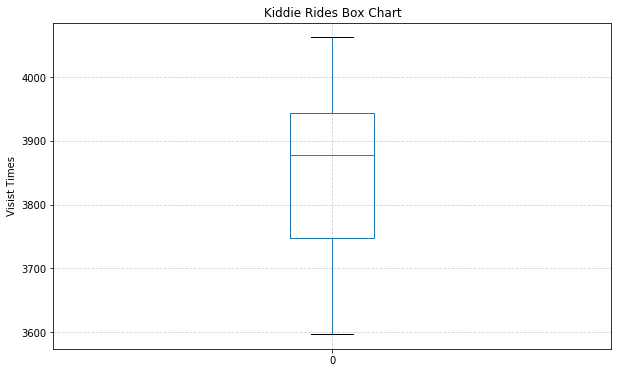

In [28]:
import numpy as np
import pandas as pd

sql = ("SELECT COUNT(t1.visitorID) as num "
      "FROM checkin t1 inner join attraction t2 "
      "ON t1.attraction = t2.AttractionID "
      "WHERE t2.category='Kiddie Rides\r' "
      "GROUP BY t2.AttractionID "
      "ORDER BY num")
data = cursor.execute(sql).fetchall()

df = pd.DataFrame(data)
df.plot.box(title="Kiddie Rides Box Chart")
plt.grid(linestyle="--", alpha=0.6)
plt.ylabel("Visist Times")
plt.show()